In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import shutil
import os
import time
import tqdm
import laspy
import geopandas as gpd
import matplotlib.colors as mcolors

In [1]:
basePath = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/"
neighborhood = "Test_70_el Besòs i el Maresme"
parcelsFolder = basePath + "/Results/" + neighborhood + "/Parcels/"
parcels = ["4157903DF3845E", "4054901DF3845C"]#"4054901DF3845C"#
constructions =["86", "408"]#"408"#

# Get the original data

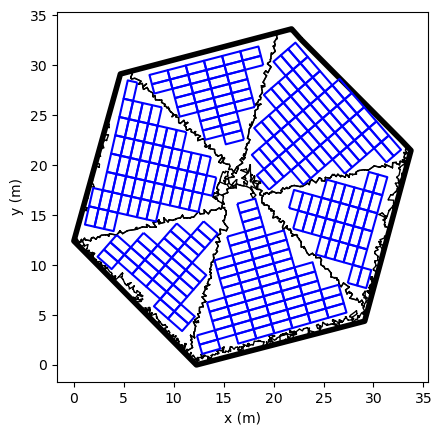

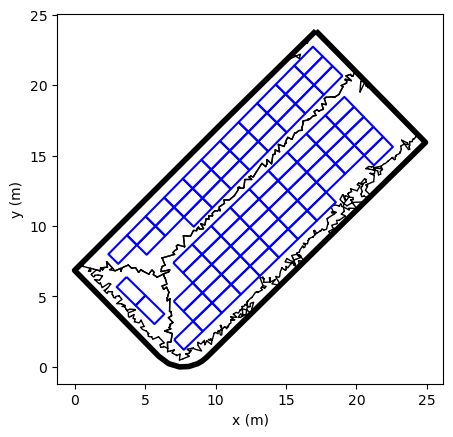

In [14]:
constructionFolders = [parcelsFolder + parcels[i] + "/" + constructions[i] + "/" for i in range(len(parcels))] 
cadasterPaths = [constructionFolders[i] + "/Map files/" + constructions[i] + ".gpkg" for i in range(len(parcels))] 
cadasterGDFs = [gpd.read_file(cadasterPaths[i]) for i in range(len(parcels))] 

planeIDpaths = [constructionFolders[i] + "/Plane Identification/" + constructions[i] + ".gpkg" for i in range(len(parcels))] 
planesGDF = [gpd.read_file(planeIDpaths[i]) for i in range(len(parcels))] 

panelsPath = [constructionFolders[i] + "/Solar Estimation Panels Simulated/" + constructions[i] + ".gpkg" for i in range(len(parcels))] 
panelsGDFs = [gpd.read_file(panelsPath[i]) for i in range(len(parcels))] 


for i in range(len(parcels)):
    fig, ax = plt.subplots()

    minx, miny, _, _ = cadasterGDFs[i].total_bounds
    cadasterGDFs[i]["geometry"] = cadasterGDFs[i].translate(xoff=-minx, yoff=-miny)
    planesGDF[i]["geometry"] = planesGDF[i].translate(xoff=-minx, yoff=-miny)
    panelsGDFs[i]["geometry"] = panelsGDFs[i].translate(xoff=-minx, yoff=-miny)

    planesGDF[i].plot(ax = ax, edgecolor="black",  facecolor="none")
    cadasterGDFs[i].plot(ax = ax, edgecolor="black", facecolor="none", linewidth=4)

    panelsGDFs[i].exterior.plot(ax = ax, edgecolor="blue")

    ax.set_xlabel("x (m)")
    ax.set_ylabel("y (m)")
    ax.set_aspect("equal", adjustable='box')
    # plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Solar Estimation/Panel Placement.png",bbox_inches='tight')
    plt.show()

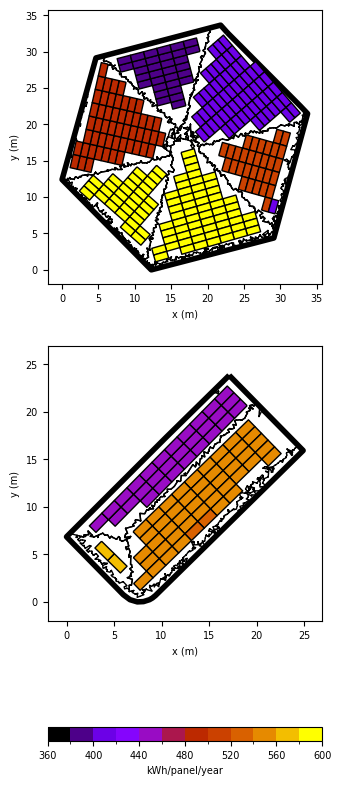

In [76]:
plt.rcParams.update({
    # "font.family": "Times New Roman",
    "font.size": 7
})

constructionFolders = [parcelsFolder + parcels[i] + "/" + constructions[i] + "/" for i in range(len(parcels))] 
cadasterPaths = [constructionFolders[i] + "/Map files/" + constructions[i] + ".gpkg" for i in range(len(parcels))] 
cadasterGDFs = [gpd.read_file(cadasterPaths[i]) for i in range(len(parcels))] 

planeIDpaths = [constructionFolders[i] + "/Plane Identification/" + constructions[i] + ".gpkg" for i in range(len(parcels))] 
planesGDF = [gpd.read_file(planeIDpaths[i]) for i in range(len(parcels))] 

panelsPath = [constructionFolders[i] + "/Solar Estimation Panels Simulated/" + constructions[i] + ".gpkg" for i in range(len(parcels))] 
panelsGDFs = [gpd.read_file(panelsPath[i]) for i in range(len(parcels))] 

mm = 1/25.4
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (90*mm, 250*mm))
axs = [ax1, ax2]

    
boundaries = np.arange(360, 601, 20)  # From 200 to 300, in steps of 20
norm = mcolors.BoundaryNorm(boundaries, ncolors=256)

for i in range(len(axs)):
    minx, miny, maxx, maxy = cadasterGDFs[i].total_bounds
    width = maxx - minx
    height = maxy - miny
    side = max(width, height)

    ax = axs[i] 

    minx, miny, _, _ = cadasterGDFs[i].total_bounds
    cadasterGDFs[i]["geometry"] = cadasterGDFs[i].translate(xoff=-minx, yoff=-miny)
    planesGDF[i]["geometry"] = planesGDF[i].translate(xoff=-minx, yoff=-miny)
    panelsGDFs[i]["geometry"] = panelsGDFs[i].translate(xoff=-minx, yoff=-miny)

    planesGDF[i].plot(ax = ax, edgecolor="black",  facecolor="none")
    cadasterGDFs[i].plot(ax = ax, edgecolor="black", facecolor="none", linewidth=4)

    ax.set_xlabel("x (m)")
    ax.set_ylabel("y (m)")
    ax.set_aspect("equal", adjustable='box')


    # combined_gdf.plot(ax = ax, column='yearly', edgecolor="black", legend=True, cmap='gnuplot', vmin=200, vmax=300)
    panelsGDFs[i].plot(ax=ax, column='yearly', edgecolor="black", cmap='gnuplot', norm=norm, legend=False)
    # panelsGDFs[i].exterior.plot(ax=ax, edgecolor="blue",)
    
    # # Create ScalarMappable for the colorbar
    # sm = plt.cm.ScalarMappable(cmap='gnuplot', norm=norm)
    # sm._A = []  # required for ScalarMappable

    # # Add colorbar the same height as ax
    # cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
    # cbar.set_label("kWh/panel/year")

    buffer = 2
    ax.set_xlim(0-buffer, side+buffer)
    ax.set_ylim(0-buffer, side+buffer)
    ax.set_aspect('equal', adjustable='box')

# Create ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap='gnuplot', norm=norm)
sm._A = []  # required for ScalarMappable

# Add colorbar the same height as ax
cbar = fig.colorbar(sm, ax=axs, orientation='horizontal', fraction=0.046, pad=0.14)
cbar.set_label("kWh/panel/year")

plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/SolarPanels/Vertical_Colorbar.pdf",bbox_inches='tight')
plt.show()
# plt.plot(panelsGDFs[i].yearly)

# Shading

14.csv
18.csv
17.csv
15.csv
13.csv
16.csv


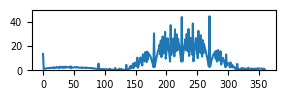

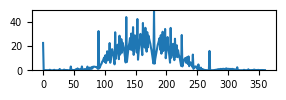

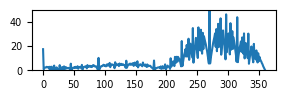

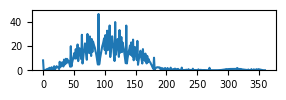

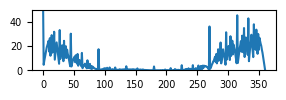

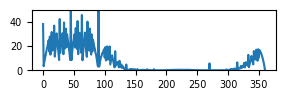

In [147]:
shadingPaths = [constructionFolders[i] + "/Shading/" for i in range(len(parcels))]
dfs = []

plt.rcParams.update({
    # "font.family": "Times New Roman",
    "font.size": 7
})

mm = 1/25.4

i = 0

for file in os.listdir(shadingPaths[i]):
    print(file)
    dfs.append(pd.read_csv(shadingPaths[i] + file,  header = None))

profiles = []
for df in dfs: 
    subdf = df.loc[:,3:363]
    averages = [] 
    for col in subdf.columns: 
        averages.append(subdf.loc[:,col].mean())

    profiles.append(averages)

for profile in profiles:
    fig, ax = plt.subplots(figsize=(80*mm, 20*mm))
    ax.set_ylim([0,50])
    plt.plot(profile)
    plt.show()

1.csv
2.csv
3.csv
4.csv


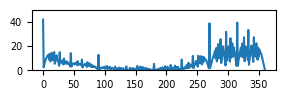

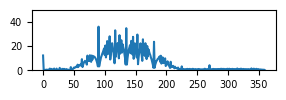

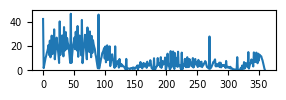

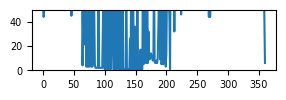

In [148]:
i = 1
dfs = []

for file in os.listdir(shadingPaths[i]):
    print(file)
    dfs.append(pd.read_csv(shadingPaths[i] + file,  header = None))

profiles = []
for df in dfs: 
    subdf = df.loc[:,3:363]
    averages = [] 
    for col in subdf.columns: 
        averages.append(subdf.loc[:,col].mean())

    profiles.append(averages)

for profile in profiles:
    fig, ax = plt.subplots(figsize=(80*mm, 20*mm))
    ax.set_ylim([0,50])
    plt.plot(profile)
    plt.show()

14.csv
18.csv
17.csv
15.csv
13.csv
16.csv


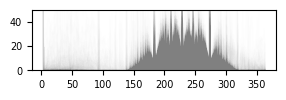

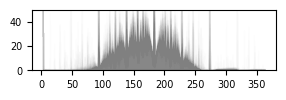

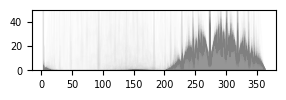

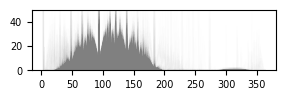

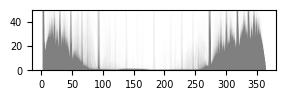

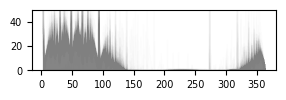

In [149]:
i = 0
dfs = []
for file in os.listdir(shadingPaths[i]):
    print(file)
    dfs.append(pd.read_csv(shadingPaths[i] + file,  header = None))

profiles = []
for df in dfs: 
    subdf = df.loc[:,3:363]
    num_rows = subdf.shape[0]
    alpha = 1.0 / num_rows  # transparency

    fig, ax = plt.subplots(figsize=(80*mm, 20*mm))
    ax.set_ylim([0,50])
    
    x = subdf.columns.values.astype(float)  # x-values are column indices

    for _, row in subdf.iterrows():
        ax.fill_between(x, row.values, color='gray', alpha=alpha)
    
    plt.show()
    plt.close()

1.csv
2.csv
3.csv
4.csv


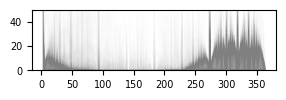

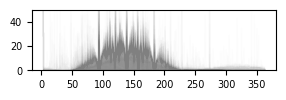

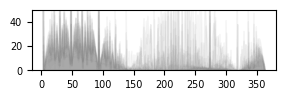

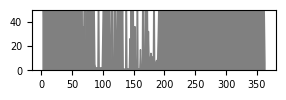

In [150]:
i = 1
dfs = []
for file in os.listdir(shadingPaths[i]):
    print(file)
    dfs.append(pd.read_csv(shadingPaths[i] + file,  header = None))

profiles = []
for df in dfs: 
    subdf = df.loc[:,3:363]
    num_rows = subdf.shape[0]
    alpha = 1.0 / num_rows  # transparency

    fig, ax = plt.subplots(figsize=(80*mm, 20*mm))
    ax.set_ylim([0,50])
    
    x = subdf.columns.values.astype(float)  # x-values are column indices

    for _, row in subdf.iterrows():
        ax.fill_between(x, row.values, color='gray', alpha=alpha)
    
    plt.show()
    plt.close()

1.csv
2.csv
3.csv
4.csv


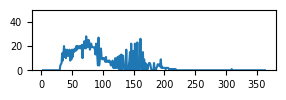

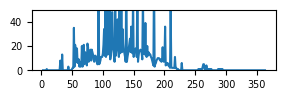

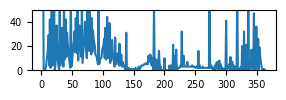

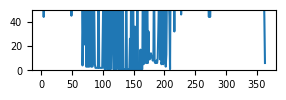

In [158]:
i = 1
dfs = []

for file in os.listdir(shadingPaths[i]):
    print(file)
    dfs.append(pd.read_csv(shadingPaths[i] + file,  header = None))

profiles = []
for df in dfs: 
    subdf = df.loc[:,3:363]
   
    fig, ax = plt.subplots(figsize=(80*mm, 20*mm))
    ax.set_ylim([0,50])
    plt.plot(subdf.loc[0,:])
    plt.show()

In [157]:
subdf.loc[0,:] 

3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
      ... 
359    0.0
360    0.0
361    0.0
362    0.0
363    0.0
Name: 0, Length: 361, dtype: float64

(0, 0       434050.00
1      4585534.00
2           14.74
3           90.00
4            1.00
          ...    
359         10.00
360          7.00
361          3.00
362          0.00
363          0.00
Name: 0, Length: 364, dtype: float64)
(1, 0       434050.00
1      4585533.00
2           14.14
3           62.00
4            3.00
          ...    
359         20.00
360         14.00
361         10.00
362          3.00
363          0.00
Name: 1, Length: 364, dtype: float64)
(2, 0       434051.00
1      4585533.00
2           14.73
3           42.00
4            3.00
          ...    
359         10.00
360          8.00
361          7.00
362          2.00
363          0.00
Name: 2, Length: 364, dtype: float64)
(3, 0       434051.00
1      4585534.00
2           15.03
3           23.00
4            1.00
          ...    
359         11.00
360          8.00
361          4.00
362          1.00
363          0.00
Name: 3, Length: 364, dtype: float64)
(4, 0       434051.00
1      4585535.00
